## MASTERS 2025 script

### Scrape the recent data

In [508]:
# List of URLs to process.
data_urls = [
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2025&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2024&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2023&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2022&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2021&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2020&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2019&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2018&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=pga&year=2017&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2025&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2024&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2023&sg=true",
    "https://datagolf.com/stats/tour-lists?tour=liv&year=2022&sg=true"
]

In [510]:
import re
import pandas as pd
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs

def clean_numeric(value):
    # Remove any content inside parentheses and any leading plus sign.
    value = re.sub(r'\(.*?\)', '', value)
    return float(value.replace('+', '').strip())

def extract_table_from_url(url):
    # Parse URL query parameters for tour and year.
    parsed_url = urlparse(url)
    qs = parse_qs(parsed_url.query)
    tour_val = qs.get('tour', [''])[0]
    year_val = qs.get('year', [''])[0]
    
    # Set up Firefox in headless mode.
    options = Options()
    options.headless = True
    driver = webdriver.Firefox(options=options)
    driver.get(url)
    
    # Wait until at least one row is loaded.
    try:
        WebDriverWait(driver, 30).until(
            EC.presence_of_element_located((By.CLASS_NAME, "lists-datarow"))
        )
    except Exception as e:
        print("Timed out waiting for table rows on URL:", url, e)
    html = driver.page_source
    driver.quit()
    
    soup = BeautifulSoup(html, 'html.parser')
    
    # Extract headers from the header div.
    header_div = soup.find('div', class_='head')
    headers = []
    for h in header_div.find_all('div', class_='datahead'):
        main_text = h.find(text=True, recursive=False)
        if main_text:
            headers.append(main_text.strip())
        else:
            headers.append(h.get_text(strip=True))
    # Drop the "R" header (rounds) which is at index 1.
    if len(headers) == 9:
        headers.pop(1)
    # Final header list should be: ['Player', 'Putt', 'Arg', 'App', 'OTT', 'BS', 'T2G', 'Total']
    
    # Extract rows – each row is in a div with class "lists-datarow".
    rows = []
    for row_div in soup.find_all('div', class_='lists-datarow'):
        cols = [col.get_text(strip=True) for col in row_div.find_all('div', class_='data')]
        # If there is a redundant short name column, remove it.
        if len(cols) == 10:
            cols.pop(1)
        # Drop the R (Rounds) column which is now at index 1.
        if len(cols) == 9:
            cols.pop(1)
        rows.append(cols)
    
    # Clean numeric fields: for all columns except "Player".
    for i, row in enumerate(rows):
        new_row = []
        for j, cell in enumerate(row):
            if j == 0:  # Keep player name as is.
                new_row.append(cell)
            else:
                try:
                    new_row.append(clean_numeric(cell))
                except Exception as e:
                    new_row.append(None)
        rows[i] = new_row
    
    # Build DataFrame and add tour/year.
    df = pd.DataFrame(rows, columns=headers)
    df['tour'] = tour_val
    df['year'] = int(year_val) if year_val.isdigit() else year_val
    return df



# Loop over URLs and union the results.
dfs = []
for url in data_urls:
    print("Processing URL:", url)
    try:
        df_url = extract_table_from_url(url)
        dfs.append(df_url)
    except Exception as e:
        print("Error processing", url, e)

final_df = pd.concat(dfs, ignore_index=True)
print(final_df.head())


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2025&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2024&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2023&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2022&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2021&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2020&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2019&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2018&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=pga&year=2017&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2025&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2024&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2023&sg=true


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)
/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:25: DeprecationWarning: headless property is deprecated, instead use add_argument('-headless')
  options.headless = True


Processing URL: https://datagolf.com/stats/tour-lists?tour=liv&year=2022&sg=true
              Player  Putt   Arg   App   OTT    BS   T2G  Total tour  year
0       Rory McIlroy  0.71  0.35  0.82  1.04  1.86  2.22   2.92  pga  2025
1    Collin Morikawa  0.33  0.38  1.47  0.75  2.22  2.60   2.92  pga  2025
2  Scottie Scheffler  0.42  0.27  1.08  0.79  1.86  2.13   2.55  pga  2025
3     Russell Henley  0.62  0.43  0.77  0.21  0.98  1.41   2.04  pga  2025
4      Justin Thomas  0.44  0.35  1.04  0.13  1.18  1.52   1.99  pga  2025


/var/folders/wn/dv_frl7d0w74gltg35w092h40000gn/T/ipykernel_1183/3992389324.py:45: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  main_text = h.find(text=True, recursive=False)


In [512]:
final_df

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year
0,Rory McIlroy,0.71,0.35,0.82,1.04,1.86,2.22,2.92,pga,2025
1,Collin Morikawa,0.33,0.38,1.47,0.75,2.22,2.60,2.92,pga,2025
2,Scottie Scheffler,0.42,0.27,1.08,0.79,1.86,2.13,2.55,pga,2025
3,Russell Henley,0.62,0.43,0.77,0.21,0.98,1.41,2.04,pga,2025
4,Justin Thomas,0.44,0.35,1.04,0.13,1.18,1.52,1.99,pga,2025
...,...,...,...,...,...,...,...,...,...,...
2139,Hudson Swafford,NaN,NaN,NaN,NaN,NaN,NaN,-1.81,liv,2022
2140,Hideto Tanihara,NaN,NaN,NaN,NaN,NaN,NaN,-1.96,liv,2022
2141,Shaun Norris,NaN,NaN,NaN,NaN,NaN,NaN,-2.05,liv,2022
2142,Jediah Morgan,NaN,NaN,NaN,NaN,NaN,NaN,-2.15,liv,2022


## Get Augusta only data

In [514]:
import re
import time
import numpy as np
import pandas as pd
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from bs4 import BeautifulSoup

def clean_numeric(text):
    """
    Remove any content inside parentheses and return the remaining text.
    e.g. "73 (+1)" becomes "73".
    """
    cleaned = re.sub(r'\(.*?\)', '', text)
    return cleaned.strip()

def clean_player_name(raw_name):
    """
    Clean the raw player name.
    If the raw name contains a comma (assumed to be "LASTNAME, FIRSTNAME"),
    split it and return "FirstName LastName" with proper title casing.
    Otherwise, just return the title-cased raw name.
    """
    if "," in raw_name:
        parts = [p.strip() for p in raw_name.split(",")]
        if len(parts) == 2:
            return f"{parts[1].title()} {parts[0].title()}"
    return raw_name.strip().title()

def extract_masters_results(url):
    """
    Use Selenium to load the page and BeautifulSoup to extract the table rows.
    Returns a DataFrame with columns: Player, R1, R2, R3, and R4.
    """
    options = Options()
    options.add_argument('-headless')
    driver = webdriver.Firefox(options=options)
    driver.get(url)
    
    # Wait for the table to load; adjust time as needed.
    time.sleep(5)
    
    html = driver.page_source
    driver.quit()
    
    soup = BeautifulSoup(html, 'html.parser')
    
    # Locate the container holding the table rows (adjust the selector if needed)
    table_div = soup.find("div", class_="table-div")
    if not table_div:
        print("Table container not found for", url)
        return pd.DataFrame()
    
    # Each row is a div with class "datarow"
    rows = table_div.find_all("div", class_="datarow")
    data = []
    for row in rows:
        # Extract the player name from the "player-col" div.
        player_div = row.find("div", class_=lambda x: x and "player-col" in x)
        if player_div:
            a_tag = player_div.find("a")
            if a_tag:
                # Use all stripped strings from the <a> tag
                raw_player = " ".join(a_tag.stripped_strings)
            else:
                raw_player = player_div.get_text(strip=True)
            player = clean_player_name(raw_player)
        else:
            player = ""
        
        # Extract round scores; if a round is missing, the text will be empty.
        r1_div = row.find("div", class_=lambda x: x and "r1-col" in x)
        r1 = clean_numeric(r1_div.get_text()) if r1_div else ""
        
        r2_div = row.find("div", class_=lambda x: x and "r2-col" in x)
        r2 = clean_numeric(r2_div.get_text()) if r2_div else ""
        
        r3_div = row.find("div", class_=lambda x: x and "r3-col" in x)
        r3 = clean_numeric(r3_div.get_text()) if r3_div else ""
        
        r4_div = row.find("div", class_=lambda x: x and "r4-col" in x)
        r4 = clean_numeric(r4_div.get_text()) if r4_div else ""
        
        data.append({
            "Player": player,
            "R1": r1,
            "R2": r2,
            "R3": r3,
            "R4": r4
        })
    
    df = pd.DataFrame(data)
    return df

def compute_avg_score(row):
    """
    Given a row with columns R1, R2, R3, and R4, convert them to floats (if possible)
    and compute the average of only the valid (non-empty) rounds.
    """
    rounds = []
    for col in ['R1', 'R2', 'R3', 'R4']:
        try:
            val = float(row[col])
            rounds.append(val)
        except:
            continue
    if len(rounds) > 0:
        return sum(rounds) / len(rounds)
    else:
        return np.nan

# List of URLs to process (one for each year)
data_urls = [
    "https://datagolf.com/past-results/majors/14/2024",
    "https://datagolf.com/past-results/majors/14/2023",
    "https://datagolf.com/past-results/majors/14/2022",
    "https://datagolf.com/past-results/majors/14/2021",
    "https://datagolf.com/past-results/majors/14/2020",
    "https://datagolf.com/past-results/majors/14/2019",
    "https://datagolf.com/past-results/majors/14/2018",
]

# List to store each year's DataFrame (with only Player and the new average column)
dfs = []

for url in data_urls:
    print("Processing URL:", url)
    df = extract_masters_results(url)
    if df.empty:
        continue
    # Extract year from URL (assumes the year is the last part of the URL)
    year = url.rstrip("/").split("/")[-1]
    
    # Compute the average score for available rounds and create a new column
    df[f"{year}_masters_avg_score"] = df.apply(compute_avg_score, axis=1)
    
    # Keep only the Player and the new average score column
    df_small = df[["Player", f"{year}_masters_avg_score"]]
    dfs.append(df_small)

# Merge the DataFrames from different years on the "Player" column (outer join)
if dfs:
    merged_df = dfs[0]
    for df in dfs[1:]:
        merged_df = pd.merge(merged_df, df, on="Player", how="outer")
    print("Merged DataFrame:")
    print(merged_df.head())
else:
    print("No data frames extracted.")


Processing URL: https://datagolf.com/past-results/majors/14/2024
Processing URL: https://datagolf.com/past-results/majors/14/2023
Processing URL: https://datagolf.com/past-results/majors/14/2022
Processing URL: https://datagolf.com/past-results/majors/14/2021
Processing URL: https://datagolf.com/past-results/majors/14/2020
Processing URL: https://datagolf.com/past-results/majors/14/2019
Processing URL: https://datagolf.com/past-results/majors/14/2018
Merged DataFrame:
              Player  2024_masters_avg_score  2023_masters_avg_score  \
0  Scheffler Scottie                   69.25                   71.00   
1       Aberg Ludvig                   70.25                     NaN   
2    Fleetwood Tommy                   71.00                   72.75   
3           Homa Max                   71.00                   73.50   
4    Morikawa Collin                   71.00                   71.00   

   2022_masters_avg_score  2021_masters_avg_score  2020_masters_avg_score  \
0                

In [516]:
# check what the data looks like
merged_df.describe(include='all')

,Player,2024_masters_avg_score,2023_masters_avg_score,2022_masters_avg_score,2021_masters_avg_score,2020_masters_avg_score,2019_masters_avg_score,2018_masters_avg_score
count,225,89.000000,86.000000,90.000000,88.000000,92.000000,87.000000,87.000000
unique,225,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Scheffler Scottie,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,74.373596,73.470930,74.511111,73.650568,72.233696,72.324713,73.701149
std,NaN,2.141687,2.248012,2.451184,2.415390,2.292727,2.358839,3.027932
min,NaN,69.250000,69.000000,69.500000,69.500000,67.000000,68.750000,68.250000
25%,NaN,73.000000,71.562500,72.750000,72.000000,70.750000,70.750000,71.500000
50%,NaN,74.250000,73.500000,74.375000,73.000000,72.250000,71.750000,73.000000
75%,NaN,75.500000,75.000000,75.937500,74.812500,73.500000,74.000000,76.000000


In [518]:
## merge the two datasets

In [520]:
import pandas as pd

# ===== STEP 1: Standardize the Player names ===== #

# For final_df: convert names to lowercase, remove extra spaces, then title-case.
final_df['Player'] = (
    final_df['Player']
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
    .str.title()
)

# For merged_df: convert names to lowercase, remove extra spaces, then reverse if two words.
merged_df['Player'] = (
    merged_df['Player']
    .str.lower()
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# Define a helper function to reverse names that are exactly two words.
def reverse_if_two(name):
    parts = name.split(' ')
    if len(parts) == 2:
        return parts[1] + " " + parts[0]
    return name

merged_df['Player'] = merged_df['Player'].apply(reverse_if_two)

# Finally, convert merged_df names to title-case.
merged_df['Player'] = merged_df['Player'].str.title()

# ===== STEP 2: Reshape merged_df (melt it) ===== #
# The master score columns are named like "2024_masters_avg_score", etc.
# We melt merged_df so that each such column becomes a row.
melted = merged_df.melt(id_vars=['Player'],
                        var_name='year_master',
                        value_name='masters_avg_score')

# Extract the 4-digit year from the "year_master" column
melted['year'] = melted['year_master'].str.extract(r'(\d{4})').astype(int)

# Drop the now unneeded "year_master" column
melted.drop(columns='year_master', inplace=True)

# ===== STEP 3: Merge final_df with the melted masters data ===== #
# Do a left join on both "Player" and "year". This ensures every row in final_df remains.
final_merged = pd.merge(final_df, melted, on=['Player', 'year'], how='left')

print(final_merged.head())


              Player  Putt   Arg   App   OTT    BS   T2G  Total tour  year  \
0       Rory Mcilroy  0.71  0.35  0.82  1.04  1.86  2.22   2.92  pga  2025   
1    Collin Morikawa  0.33  0.38  1.47  0.75  2.22  2.60   2.92  pga  2025   
2  Scottie Scheffler  0.42  0.27  1.08  0.79  1.86  2.13   2.55  pga  2025   
3     Russell Henley  0.62  0.43  0.77  0.21  0.98  1.41   2.04  pga  2025   
4      Justin Thomas  0.44  0.35  1.04  0.13  1.18  1.52   1.99  pga  2025   

   masters_avg_score  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


In [522]:
final_merged.describe(include='all')

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score
count,2144,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2055.000000,2144.000000,2144,2144.000000,491.000000
unique,521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
top,Dustin Johnson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pga,NaN,NaN
freq,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945,NaN,NaN
mean,NaN,0.004477,0.011124,0.020949,0.007299,0.028389,0.039387,0.043941,NaN,2021.184235,72.948574
std,NaN,0.389644,0.263189,0.477083,0.440677,0.789598,0.875992,0.984227,NaN,2.587726,2.261203
min,NaN,-2.280000,-1.480000,-2.990000,-2.080000,-5.070000,-5.020000,-4.400000,NaN,2017.000000,67.000000
25%,NaN,-0.240000,-0.150000,-0.260000,-0.240000,-0.450000,-0.480000,-0.560000,NaN,2019.000000,71.500000
50%,NaN,0.010000,0.020000,0.040000,0.030000,0.040000,0.040000,0.040000,NaN,2021.000000,72.750000
75%,NaN,0.280000,0.180000,0.325000,0.285000,0.525000,0.610000,0.670000,NaN,2023.000000,74.375000


In [524]:
final_merged[final_merged['Player'] == "Collin Morikawa"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score
1,Collin Morikawa,0.33,0.38,1.47,0.75,2.22,2.60,2.92,pga,2025,NaN
201,Collin Morikawa,0.24,0.41,0.59,0.58,1.17,1.59,1.83,pga,2024,71.00
411,Collin Morikawa,0.00,0.15,1.16,0.58,1.74,1.89,1.89,pga,2023,71.00
641,Collin Morikawa,0.05,-0.07,1.00,0.50,1.50,1.43,1.49,pga,2022,71.00
859,Collin Morikawa,-0.31,0.13,1.31,0.53,1.84,1.97,1.74,pga,2021,71.75
1085,Collin Morikawa,0.05,0.04,1.04,0.61,1.65,1.69,1.65,pga,2020,72.00
1297,Collin Morikawa,0.01,-0.02,0.92,0.39,1.32,1.30,1.31,pga,2019,NaN


In [526]:
masters_field[masters_field['Player'] == "Collin Morikawa"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score
0,Collin Morikawa,0.33,0.37,1.48,0.75,2.23,2.60,2.93,pga,2025,NaN
198,Collin Morikawa,0.24,0.41,0.59,0.58,1.17,1.59,1.83,pga,2024,71.00
408,Collin Morikawa,0.00,0.15,1.16,0.58,1.74,1.89,1.89,pga,2023,71.00
638,Collin Morikawa,0.05,-0.07,1.00,0.50,1.50,1.43,1.49,pga,2022,71.00
856,Collin Morikawa,-0.31,0.13,1.31,0.53,1.84,1.97,1.74,pga,2021,71.75
1082,Collin Morikawa,0.05,0.04,1.04,0.61,1.65,1.69,1.65,pga,2020,72.00
1294,Collin Morikawa,0.01,-0.02,0.92,0.39,1.32,1.30,1.31,pga,2019,NaN


# Get odds (as of 2 April from sky bet) 

### Calculating Implied Probabilities from Betting Odds

If a player is **4/1 to win**, and there’s a **1/5 each-way option** paying for a **top 6 finish**, we can calculate the **implied probabilities** based on those odds.

#### 1. Win (4/1)

Fractional odds of 4/1 mean you get £4 profit for every £1 staked.  
To convert to implied probability:

\[
\text{Implied Probability} = \frac{1}{(4 + 1)} = \frac{1}{5} = 20\%
\]

#### 2. Top 6 (Each-Way at 1/5 Odds)

Each-way betting splits your stake into two bets:  
- One for the player to **win** (already covered)  
- One for the player to **place** (top 6), paid at **1/5 of the win odds**

So the place odds are:

\[
\frac{4}{1} \times \frac{1}{5} = \frac{4}{5}
\]

Convert those odds to implied probability:

\[
\text{Implied Probability (Top 6)} = \frac{1}{(4/5 + 1)} = \frac{1}{9/5} = \frac{5}{9} \approx 55.6\%
\]

---

**Final Answers:**
- **Win:** 20% implied probability  
- **Top 6 (Place):** ~55.6% implied probability


In [529]:
import pandas as pd

# Raw data (same alternating format as before)
raw_data = [
    "Scottie Scheffler", "4/1", "Rory McIlroy", "6/1", "Collin Morikawa", "12/1", "Jon Rahm", "16/1",
    "Ludvig Aberg", "16/1", "Bryson Dechambeau", "18/1", "Justin Thomas", "20/1", "Xander Schauffele", "20/1",
    "Hideki Matsuyama", "25/1", "Joaquin Niemann", "25/1", "Brooks Koepka", "28/1", "Patrick Cantlay", "28/1",
    "Tommy Fleetwood", "28/1", "Jordan Spieth", "30/1", "Viktor Hovland", "30/1", "Shane Lowry", "33/1",
    "Minwoo Lee", "35/1", "Tyrrell Hatton", "35/1", "Russell Henley", "40/1", "Will Zalatoris", "40/1",
    "Akshay Bhatia", "50/1", "Cameron Smith", "50/1", "Robert MacIntyre", "50/1", "Corey Conners", "55/1",
    "Sepp Straka", "60/1", "Tony Finau", "60/1", "Jason Day", "66/1", "Wyndham Clark", "66/1",
    "Dustin Johnson", "80/1", "Justin Rose", "80/1", "Patrick Reed", "80/1", "Sahith Theegala", "80/1",
    "Sergio Garcia", "80/1", "Tom Kim", "80/1", "Matt Fitzpatrick", "100/1", "Sam Burns", "100/1",
    "Sungjae Im", "100/1", "Keegan Bradley", "110/1", "Aaron Rai", "125/1", "Adam Scott", "125/1",
    "Billy Horschel", "125/1", "Cameron Young", "125/1", "Daniel Berger", "125/1", "Davis Thompson", "125/1",
    "Maverick McNealy", "125/1", "Phil Mickelson", "125/1", "Thomas Detry", "125/1", "Brian Harman", "150/1",
    "Byeong Hun An", "150/1", "J.J. Spaun", "150/1", "Nicolai Hojgaard", "150/1", "Rasmus Hojgaard", "150/1",
    "Taylor Pendrith", "150/1", "Denny McCarthy", "175/1", "Lucas Glover", "175/1", "Max Homa", "175/1",
    "Michael Kim", "175/1", "Cam Davis", "200/1", "Christiaan Bezuidenhout", "200/1", "Harris English", "200/1",
    "Laurie Canter", "200/1", "Max Greyserman", "200/1", "Nick Dunlap", "250/1", "Nick Taylor", "250/1",
    "Nico Echavarria", "250/1", "Stephan Jaeger", "250/1", "Tom Hoge", "250/1", "Austin Eckroat", "300/1",
    "Chris Kirk", "300/1", "J.T. Poston", "300/1", "Joe Highsmith", "300/1", "Bubba Watson", "400/1",
    "Charl Schwartzel", "400/1", "Danny Willett", "400/1", "Davis Riley", "400/1", "Jhonattan Vegas", "400/1",
    "Kevin Yu", "400/1", "Matt McCarty", "400/1", "Adam Schenk", "500/1", "Brian Campbell", "500/1",
    "Matthieu Pavon", "500/1", "Patton Kizzire", "500/1", "Thriston Lawrence", "500/1", "Jose Luis Ballester", "600/1",
    "Justin Hastings", "750/1", "Bernhard Langer", "1000/1", "Evan Beck", "1000/1", "Zach Johnson", "1000/1",
    "Fred Couples", "1500/1", "Angel Cabrera", "2000/1", "Hiroshi Tai", "2000/1", "Rafael Campos", "2000/1",
    "Noah Kent", "2500/1", "Vijay Singh", "2500/1", "Mike Weir", "5000/1", "Jose Maria Olazabal", "7500/1"
]

# Separate into names and odds
players = raw_data[::2]
odds_values = raw_data[1::2]

# Create dataframe
odds = pd.DataFrame({
    "Player": players,
    "Odds": odds_values
})

# Function to convert fractional odds to implied probability
def fractional_to_percent(fraction):
    num, denom = map(int, fraction.split('/'))
    return round(100 / (num / denom + 1), 2)

# Add win and EW top 6 probabilities
odds["Win Probability (%)"] = odds["Odds"].apply(fractional_to_percent)

def ew_fraction_to_percent(fraction):
    num, denom = map(int, fraction.split('/'))
    ew_fraction = f"{num}/{denom * 5}"  # each-way is 1/5 odds
    num, denom = map(int, ew_fraction.split('/'))
    return round(100 / (num / denom + 1), 2)

odds["EW Top 6 Probability (%)"] = odds["Odds"].apply(ew_fraction_to_percent)


In [531]:
odds

,Player,Odds,Win Probability (%),EW Top 6 Probability (%)
0,Scottie Scheffler,4/1,20.00,55.56
1,Rory McIlroy,6/1,14.29,45.45
2,Collin Morikawa,12/1,7.69,29.41
3,Jon Rahm,16/1,5.88,23.81
4,Ludvig Aberg,16/1,5.88,23.81
...,...,...,...,...
91,Rafael Campos,2000/1,0.05,0.25
92,Noah Kent,2500/1,0.04,0.20
93,Vijay Singh,2500/1,0.04,0.20
94,Mike Weir,5000/1,0.02,0.10


# create a 'masters' flag

In [533]:
# Create lowercase versions of player names for matching
final_merged["player_lower"] = final_merged["Player"].str.lower()
odds["player_lower"] = odds["Player"].str.lower()

# Merge using the lowercase version
complete_data = final_merged.merge(
    odds.drop(columns=["Player"]),  # Drop the original 'Player' from odds
    how="left",
    on="player_lower"
)

# Optional: Drop the temporary lowercase join column
complete_data = complete_data.drop(columns=["player_lower"])

# Add flag for whether the player matched to the odds table
complete_data["in_2025_masters"] = complete_data["Odds"].notnull()


In [755]:
complete_data

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters
0,Rory Mcilroy,0.71,0.35,0.82,1.04,1.86,2.22,2.92,pga,2025,NaN,6/1,14.29,45.45,True
1,Collin Morikawa,0.33,0.38,1.47,0.75,2.22,2.60,2.92,pga,2025,NaN,12/1,7.69,29.41,True
2,Scottie Scheffler,0.42,0.27,1.08,0.79,1.86,2.13,2.55,pga,2025,NaN,4/1,20.00,55.56,True
3,Russell Henley,0.62,0.43,0.77,0.21,0.98,1.41,2.04,pga,2025,NaN,40/1,2.44,11.11,True
4,Justin Thomas,0.44,0.35,1.04,0.13,1.18,1.52,1.99,pga,2025,NaN,20/1,4.76,20.00,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,Hudson Swafford,NaN,NaN,NaN,NaN,NaN,NaN,-1.81,liv,2022,73.25,NaN,NaN,NaN,False
2140,Hideto Tanihara,NaN,NaN,NaN,NaN,NaN,NaN,-1.96,liv,2022,NaN,NaN,NaN,NaN,False
2141,Shaun Norris,NaN,NaN,NaN,NaN,NaN,NaN,-2.05,liv,2022,NaN,NaN,NaN,NaN,False
2142,Jediah Morgan,NaN,NaN,NaN,NaN,NaN,NaN,-2.15,liv,2022,NaN,NaN,NaN,NaN,False


In [539]:
complete_data[complete_data['Player'] == "Corey Conners"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters
16,Corey Conners,0.23,0.15,0.35,0.64,0.99,1.15,1.37,pga,2025,NaN,55/1,1.79,8.33,True
211,Corey Conners,-0.06,-0.03,0.93,0.47,1.40,1.38,1.32,pga,2024,73.75,55/1,1.79,8.33,True
431,Corey Conners,-0.09,-0.07,0.59,0.69,1.28,1.21,1.06,pga,2023,76.00,55/1,1.79,8.33,True
652,Corey Conners,0.02,0.03,0.59,0.74,1.33,1.36,1.26,pga,2022,71.25,55/1,1.79,8.33,True
867,Corey Conners,0.06,-0.11,0.91,0.75,1.66,1.55,1.55,pga,2021,71.00,55/1,1.79,8.33,True
1102,Corey Conners,-0.50,-0.12,0.73,0.72,1.45,1.33,1.03,pga,2020,69.75,55/1,1.79,8.33,True
1354,Corey Conners,-0.56,-0.11,0.72,0.69,1.40,1.29,0.37,pga,2019,72.00,55/1,1.79,8.33,True
1624,Corey Conners,-0.42,-0.24,0.18,0.43,0.61,0.37,-0.05,pga,2018,NaN,55/1,1.79,8.33,True


In [964]:
complete_data[complete_data['Player'] == "Robert Macintyre"]

,Player,Putt,Arg,App,OTT,BS,T2G,Total,tour,year,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters
13,Robert Macintyre,-0.14,0.2,0.76,0.73,1.49,1.69,1.54,pga,2025,NaN,50/1,1.96,9.09,True
250,Robert Macintyre,0.25,0.2,-0.04,0.35,0.30,0.50,0.60,pga,2024,NaN,50/1,1.96,9.09,True
922,Robert Macintyre,-0.15,0.3,-0.07,0.23,0.16,0.46,0.50,pga,2021,71.5,50/1,1.96,9.09,True


## Recent testing with deep research

In [1018]:
import pandas as pd

# Define the feature columns to use (strokes gained metrics)
features = ['Putt', 'Arg', 'App', 'OTT', 'BS', 'T2G', 'Total']

# Filter training data: all rows with a Masters result (masters_avg_score is not null)
train_data = complete_data[complete_data['masters_avg_score'].notna()].copy()

# Config 1: Use same-year strokes-gained data
X_train1 = train_data[features].copy()
y_train = train_data['masters_avg_score'].values

# Config 2: Incorporate previous year's data (75% current year, 25% previous year)
train_data['prev_year'] = train_data['year'] - 1
# Merge to get previous year's strokes-gained for the same player
train_prev = train_data.merge(
    complete_data, how='left',
    left_on=['Player', 'prev_year'], right_on=['Player', 'year'],
    suffixes=('', '_prev')
)
# For each strokes-gained feature, compute weighted combination
X_train2 = pd.DataFrame(index=train_prev.index)
for feat in features:
    cur_feat = train_prev[f'{feat}']        # current year feature
    prev_feat = train_prev[f'{feat}_prev']  # previous year feature from merge
    # Weighted combination: 75% current, 25% previous if prev exists, else 100% current
    combined = cur_feat.copy()
    prev_available = prev_feat.notna()
    combined[prev_available] = 0.6 * cur_feat[prev_available] + 0.4 * prev_feat[prev_available]
    X_train2[feat] = combined

# Ensure X_train2 columns align with features list
X_train2.columns = features


In [1020]:
# Fill any missing values in training sets with column-wise means (like in your original code)
X_train1 = X_train1.fillna(X_train1.mean())
X_train2 = X_train2.fillna(X_train2.mean())


In [1022]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the models to test
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Fill missing values in X_train1
X_train1 = X_train1.fillna(X_train1.mean())

# Handle missing values and align target for Config 2
X_train2 = X_train2.fillna(X_train2.mean())  # Fill missing SG values
valid_idx = X_train2.dropna().index          # Keep only rows without remaining NaNs
X_train2 = X_train2.loc[valid_idx]
y_train2 = train_prev.loc[valid_idx, 'masters_avg_score']

# Dictionary to store RMSE results
rmse_results = { "Config1": {}, "Config2": {} }

# Train and evaluate each model on both configurations
for name, model in models.items():
    # Train on Config 1
    model.fit(X_train1, y_train)
    preds1 = model.predict(X_train1)
    rmse1 = np.sqrt(mean_squared_error(y_train, preds1))
    rmse_results["Config1"][name] = rmse1

    # Train on Config 2 (with filtered y_train2)
    model.fit(X_train2, y_train2)
    preds2 = model.predict(X_train2)
    rmse2 = np.sqrt(mean_squared_error(y_train2, preds2))
    rmse_results["Config2"][name] = rmse2

# Display RMSE results
for config, res in rmse_results.items():
    print(f"\n{config} RMSE:")
    for model_name, rmse_val in res.items():
        print(f"  {model_name}: {rmse_val:.3f}")



Config1 RMSE:
  Linear Regression: 2.056
  Random Forest: 0.839
  XGBoost: 0.133
  Gradient Boosting: 1.436

Config2 RMSE:
  Linear Regression: 2.073
  Random Forest: 0.843
  XGBoost: 0.116
  Gradient Boosting: 1.380


In [1024]:
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# --- Step 1: Prepare 2025 field with weighted SG metrics (Config2 logic) ---
# Merge 2025 players with their 2024 data
field_2025 = complete_data[(complete_data['in_2025_masters']) & (complete_data['year'] == 2025)].copy().reset_index(drop=True)
field_2025 = field_2025.drop_duplicates(subset=['Player'])
field_2025['prev_year'] = 2024

merged_2025 = field_2025.merge(
    complete_data,
    left_on=['Player', 'prev_year'],
    right_on=['Player', 'year'],
    suffixes=('', '_prev'),
    how='left'
)

# Define SG columns
predictor_cols = ['Putt', 'Arg', 'App', 'OTT', 'BS', 'T2G', 'Total']

# Weighted blend (75% current, 25% prev if available)
X_2025 = pd.DataFrame(index=merged_2025.index)
for col in predictor_cols:
    cur = merged_2025[col]
    prev = merged_2025[f"{col}_prev"]
    blended = cur.copy()
    mask = prev.notna()
    blended[mask] = 0.6 * cur[mask] + 0.4 * prev[mask]
    # Fill any remaining NaNs with training means
    blended = blended.fillna(train_df[col].mean())
    X_2025[col] = blended


# --- Step 2: Fit XGBoost model on Config2 with regularization ---
# Use already-prepared X_train2 and y_train2 from earlier
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_train2, y_train2)

# Predict average score for each player in 2025 field
field_2025['masters_avg_score'] = final_model.predict(X_2025)

print("\nSanity check: unique winners at different RMSE multipliers")

for mult in [1, 2, 3]:
    test_rmse = rmse * mult
    simulated_scores = field_2025['masters_avg_score'] + np.random.normal(0, test_rmse, size=len(field_2025))
    # Simulate 100 tournaments quickly and count unique winners
    winners = []
    for _ in range(10000):
        sim = simulated_scores + np.random.normal(0, test_rmse, size=len(field_2025))
        winner = field_2025['Player'].iloc[np.argmin(sim)]
        winners.append(winner)
    unique_winners = len(set(winners))
    print(f"RMSE x{mult}: {unique_winners} unique winners out of 10000 simulations")


# --- Step 3: Simulate 10,000 tournaments using model RMSE ---
# Recalculate RMSE from your actual trained Random Forest model
rf_preds = final_model.predict(X_train2)
rmse = np.sqrt(mean_squared_error(y_train2, rf_preds))
num_simulations = 10000
simulations = []

for sim in range(num_simulations):
    sim_scores = field_2025['masters_avg_score'] + np.random.normal(0, rmse * 1.2, size=len(field_2025))
    sim_ranks = pd.Series(sim_scores).rank(method='min').astype(int)
    sim_df = pd.DataFrame({
        'simulation': sim + 1,
        'Player': field_2025['Player'],
        'simulated_score': sim_scores,
        'rank': sim_ranks
    })
    simulations.append(sim_df)

simulated_augusta = pd.concat(simulations, ignore_index=True)

# --- Step 4: Summarize results ---
simulation_summary = simulated_augusta.groupby('Player').agg(
    min_simulated_score=('simulated_score', 'min'),
    max_simulated_score=('simulated_score', 'max'),
    win_count=('rank', lambda x: (x == 1).sum()),
    top6_count=('rank', lambda x: (x <= 6).sum())
).reset_index()

simulation_summary['win_percentage'] = simulation_summary['win_count'] / num_simulations * 100
simulation_summary['top6_percentage'] = simulation_summary['top6_count'] / num_simulations * 100

# --- Step 5: Merge back into final output format ---
masters_field_25 = field_2025.copy()
top_players = masters_field_25[[
    'Player', 'masters_avg_score', 'Odds', 'Win Probability (%)',
    'EW Top 6 Probability (%)', 'in_2025_masters'
]].merge(simulation_summary, on='Player', how='left')

top20 = top_players.sort_values(by='win_count', ascending=False)

# --- Step 6: Output top 20 ---
print("\nTop 20 Predicted Players for 2025 Masters with Simulation Stats:")
print(top20[[
    'Player', 'masters_avg_score', 'Odds', 'Win Probability (%)',
    'EW Top 6 Probability (%)', 'in_2025_masters',
    'min_simulated_score', 'max_simulated_score',
    'win_count', 'win_percentage', 'top6_count', 'top6_percentage'
]].head(20))



Sanity check: unique winners at different RMSE multipliers
RMSE x1: 42 unique winners out of 10000 simulations
RMSE x2: 63 unique winners out of 10000 simulations
RMSE x3: 65 unique winners out of 10000 simulations

Top 20 Predicted Players for 2025 Masters with Simulation Stats:
               Player  masters_avg_score   Odds  Win Probability (%)  \
1     Collin Morikawa            70.6200   12/1                 7.69   
72      Sergio Garcia            70.6800   80/1                 1.23   
4       Justin Thomas            70.7900   20/1                 4.76   
2   Scottie Scheffler            70.9200    4/1                20.00   
73    Joaquin Niemann            71.0125   25/1                 3.85   
5         Shane Lowry            71.2775   33/1                 2.94   
0        Rory Mcilroy            71.5575    6/1                14.29   
3      Russell Henley            71.5500   40/1                 2.44   
77      Brooks Koepka            71.7725   28/1                 3.45  

# predict the winner (original logic - linear)

Feature Importances (Ranked):
OTT      9.200381
App      8.488248
BS       7.456305
Total    3.831704
Putt     3.272142
T2G      1.290626
Arg      0.654067
dtype: float64

Predicted 2025 Masters Field (first 5 rows):
              Player  Putt   Arg   App   OTT    BS   T2G  Total tour  year  \
0       Rory Mcilroy  0.71  0.35  0.82  1.04  1.86  2.22   2.92  pga  2025   
1    Collin Morikawa  0.33  0.38  1.47  0.75  2.22  2.60   2.92  pga  2025   
2  Scottie Scheffler  0.42  0.27  1.08  0.79  1.86  2.13   2.55  pga  2025   
3     Russell Henley  0.62  0.43  0.77  0.21  0.98  1.41   2.04  pga  2025   
4      Justin Thomas  0.44  0.35  1.04  0.13  1.18  1.52   1.99  pga  2025   

   masters_avg_score  Odds  Win Probability (%)  EW Top 6 Probability (%)  \
0          70.812150   6/1                14.29                     45.45   
1          70.243777  12/1                 7.69                     29.41   
2          71.019327   4/1                20.00                     55.56   
3     

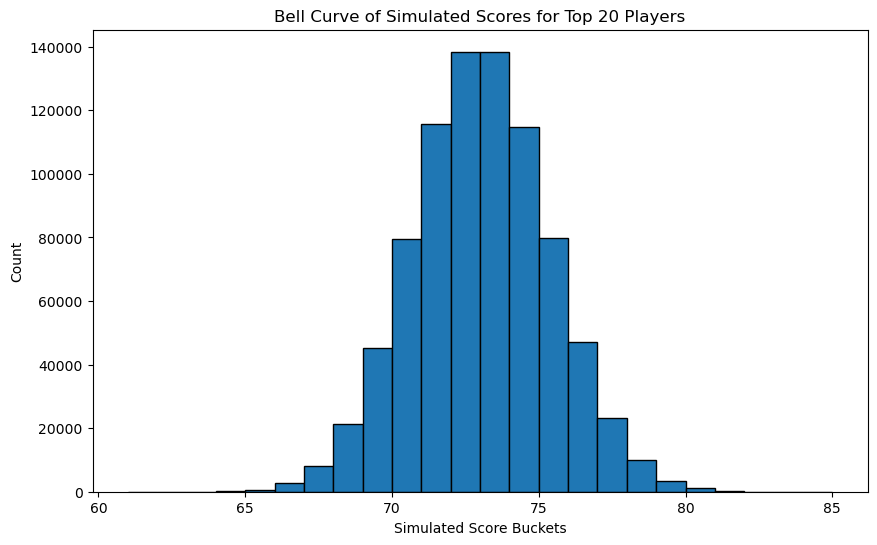

In [737]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define predictor columns (strokes gained metrics)
predictor_cols = ['Putt', 'Arg', 'App', 'OTT', 'BS', 'T2G', 'Total']

# 1. Train the model using historical data from complete_data
#    (only rows with a non-null masters_avg_score)
train_df = complete_data[complete_data['masters_avg_score'].notnull()].dropna(subset=predictor_cols + ['masters_avg_score'])
X_train = train_df[predictor_cols]
y_train = train_df['masters_avg_score']

model = LinearRegression()
model.fit(X_train, y_train)

# Calculate RMSE to model variability
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

# Feature importance (absolute coefficient values)
coef = pd.Series(model.coef_, index=predictor_cols)
coef_sorted = coef.abs().sort_values(ascending=False)
print("Feature Importances (Ranked):")
print(coef_sorted)

# 2. Predict 2025 scores using complete_data filtered for players in this year's Masters
#    Now filtering for both in_2025_masters == True and year == 2025
field_2025 = complete_data[(complete_data['in_2025_masters'] == True) & (complete_data['year'] == 2025)].copy().reset_index(drop=True)
# Remove duplicate players if any
field_2025 = field_2025.drop_duplicates(subset=['Player'])
# Fill missing predictor values with training data averages
for col in predictor_cols:
    field_2025[col] = field_2025[col].fillna(train_df[col].mean())
    
X_2025 = field_2025[predictor_cols]
predicted_scores = model.predict(X_2025)
field_2025['masters_avg_score'] = predicted_scores
masters_field_25 = field_2025

print("\nPredicted 2025 Masters Field (first 5 rows):")
print(masters_field_25.head())

# 3. Run 10000 Monte Carlo simulations for tournament outcomes
num_simulations = 10000
simulations = []

for sim in range(num_simulations):
    # Simulate scores by adding noise (RMSE as std deviation) to the predicted scores
    sim_scores = model.predict(X_2025) + np.random.normal(0, rmse, size=len(X_2025))
    # Lower score is better in golf; rank accordingly in each simulation
    sim_ranks = pd.Series(sim_scores).rank(method='min').astype(int)
    sim_df = pd.DataFrame({
        'simulation': sim + 1,
        'Player': field_2025['Player'],
        'simulated_score': sim_scores,
        'rank': sim_ranks
    })
    simulations.append(sim_df)

simulated_augusta = pd.concat(simulations, ignore_index=True)
print("\nSimulated Augusta Outcomes (first 5 rows):")
print(simulated_augusta.head())

# 4. Summarize simulation stats for each player
simulation_summary = simulated_augusta.groupby('Player').agg(
    min_simulated_score=('simulated_score', 'min'),
    max_simulated_score=('simulated_score', 'max'),
    win_count=('rank', lambda x: (x == 1).sum()),
    top6_count=('rank', lambda x: (x <= 6).sum())
).reset_index()

simulation_summary['win_percentage'] = simulation_summary['win_count'] / num_simulations * 100
simulation_summary['top6_percentage'] = simulation_summary['top6_count'] / num_simulations * 100

# 5. Merge simulation summary with the predicted 2025 scores
#    Also include the additional columns: Odds, Win Probability (%), EW Top 6 Probability (%), in_2025_masters
top_players = masters_field_25[['Player', 'masters_avg_score', 'Odds', 'Win Probability (%)', 'EW Top 6 Probability (%)', 'in_2025_masters']].merge(simulation_summary, on='Player', how='left')

# Sort players by win_count (or another metric) and select the top 20
top20 = top_players.sort_values(by='win_count', ascending=False)
print("\nTop 20 Predicted Players for 2025 Masters with Simulation Stats:")
print(top20[['Player', 'masters_avg_score', 'Odds', 'Win Probability (%)', 'EW Top 6 Probability (%)', 'in_2025_masters',
             'min_simulated_score', 'max_simulated_score', 'win_count', 'win_percentage', 'top6_count', 'top6_percentage']])

# 6. Create a histogram (bell curve) for the top 20 players
top20_players = top20['Player']
top20_simulated = simulated_augusta[simulated_augusta['Player'].isin(top20_players)]

# Define bins for the histogram with a width of 1
min_score = np.floor(top20_simulated['simulated_score'].min())
max_score = np.ceil(top20_simulated['simulated_score'].max())
bins = np.arange(min_score, max_score + 1, 1)

plt.figure(figsize=(10,6))
plt.hist(top20_simulated['simulated_score'], bins=bins, edgecolor='black')
plt.title('Bell Curve of Simulated Scores for Top 20 Players')
plt.xlabel('Simulated Score Buckets')
plt.ylabel('Count')
plt.show()


In [1025]:
rmse

0.8430661599186627

In [1028]:
top20.head(10)

,Player,masters_avg_score,Odds,Win Probability (%),EW Top 6 Probability (%),in_2025_masters,min_simulated_score,max_simulated_score,win_count,top6_count,win_percentage,top6_percentage
1,Collin Morikawa,70.6200,12/1,7.69,29.41,True,66.297436,74.461708,1762,6365,17.62,63.65
72,Sergio Garcia,70.6800,80/1,1.23,5.88,True,66.489607,74.741277,1713,6121,17.13,61.21
4,Justin Thomas,70.7900,20/1,4.76,20.00,True,66.337650,74.546118,1376,5617,13.76,56.17
2,Scottie Scheffler,70.9200,4/1,20.00,55.56,True,67.190305,74.454837,1111,5157,11.11,51.57
73,Joaquin Niemann,71.0125,25/1,3.85,16.67,True,67.111149,74.958214,989,4730,9.89,47.30
5,Shane Lowry,71.2775,33/1,2.94,13.16,True,67.286591,75.397834,600,3751,6.00,37.51
0,Rory Mcilroy,71.5575,6/1,14.29,45.45,True,67.404942,75.107650,362,2789,3.62,27.89
3,Russell Henley,71.5500,40/1,2.44,11.11,True,67.725443,75.197473,345,2779,3.45,27.79
77,Brooks Koepka,71.7725,28/1,3.45,15.15,True,67.746151,75.747342,261,2078,2.61,20.78
71,Jon Rahm,71.7275,16/1,5.88,23.81,True,67.789617,75.465313,244,2174,2.44,21.74


In [978]:
coef_sorted_df = coef_sorted.reset_index()
coef_sorted_df.columns = ['Feature', 'Coefficient']
coef_sorted_df

,Feature,Coefficient
0,OTT,9.200381
1,App,8.488248
2,BS,7.456305
3,Total,3.831704
4,Putt,3.272142
5,T2G,1.290626
6,Arg,0.654067


## tidy the prediction and output

In [1030]:
# Create a new DataFrame "prediction" from top20
prediction = top20.copy()

# 1. Drop unwanted columns:
prediction = prediction.drop(columns=['in_2025_masters', 'min_simulated_score', 'max_simulated_score',
                                        'simulated_win_count', 'simulated_top6_count'], errors='ignore')

# 2. Rename columns:
prediction = prediction.rename(columns={
    'Win Probability (%)': 'odds_Win Probability (%)',
    'EW Top 6 Probability (%)': 'odds_EW Top 6 Probability (%)',
    'win_percentage': 'simulated_win_percentage',
    'top6_percentage': 'simulated_top6_percentage'
})

# 3. Add "Odds_rank" column (rank by odds_Win Probability (%) descending)
prediction['Odds_rank'] = prediction['odds_Win Probability (%)'].rank(method='min', ascending=False).astype(int)
prediction['prediction rank'] = prediction['simulated_win_percentage'].rank(method='min', ascending=False).astype(int)


# 4. Create predictionVodds columns:
prediction['predictionVodds_win'] = prediction['simulated_win_percentage'] - prediction['odds_Win Probability (%)']
prediction['predictionVodds_top6'] = prediction['simulated_top6_percentage'] - prediction['odds_EW Top 6 Probability (%)']

# 5. Create a "priced" column: 'over' if predictionVodds_win is positive, 'under' if negative (or zero)
prediction['priced'] = np.where(prediction['predictionVodds_win'] > 0, 'under', 'over')

# 6. Sort the table by the absolute value of predictionVodds_win descending
prediction['abs_predictionVodds_win'] = prediction['predictionVodds_win'].abs()
prediction = prediction.sort_values(by='abs_predictionVodds_win', ascending=False)
prediction = prediction.drop(columns=['abs_predictionVodds_win'])

# 7. Reorder the columns so that:
#    'Player' comes first, then 'predictionVodds_win', 'predictionVodds_top6', 'priced', then the rest.
ordered_cols = ['Player', 'predictionVodds_win', 'predictionVodds_top6', 'priced']
remaining_cols = [col for col in prediction.columns if col not in ordered_cols]
new_order = ordered_cols + remaining_cols
prediction = prediction[new_order]

print("Prediction DataFrame:")
print(prediction)


Prediction DataFrame:
               Player  predictionVodds_win  predictionVodds_top6 priced  \
72      Sergio Garcia                15.90                 55.33  under   
0        Rory Mcilroy               -10.67                -17.56   over   
1     Collin Morikawa                 9.93                 34.24  under   
4       Justin Thomas                 9.00                 36.17  under   
2   Scottie Scheffler                -8.89                 -3.99   over   
..                ...                  ...                   ...    ...   
18     Denny Mccarthy                -0.12                  3.91   over   
48       Zach Johnson                -0.10                 -0.48   over   
6         Sepp Straka                 0.09                  7.87  under   
34      Joe Highsmith                -0.09                  2.80   over   
69      Rafael Campos                -0.05                 -0.25   over   

    masters_avg_score    Odds  odds_Win Probability (%)  \
72            70.6

## create Betting logic

In [1032]:
# Create a boolean mask for underpriced players
mask = prediction['priced'] == 'under'

# For underpriced players, use the absolute value of predictionVodds_win as weight
under_weights = prediction.loc[mask, 'predictionVodds_win'].abs()

# Calculate the total weight among underpriced players
total_weight = under_weights.sum()

# Compute suggested bet % as the fraction of the total weight, multiplied by 100
# Only for underpriced players; for others, set to 0
prediction.loc[mask, 'suggested bet %'] = (under_weights / total_weight) * 100
prediction.loc[~mask, 'suggested bet %'] = 0

# Optionally, round to two decimals
prediction['suggested bet %'] = prediction['suggested bet %'].round(2)

# Add a new column 'bet_type'
# If predictionVodds_win >= predictionVodds_top6, then bet_type is 'win', otherwise 'top6'
prediction['bet_type'] = np.where(prediction['predictionVodds_win'] >= prediction['predictionVodds_top6'], 'win', 'top6')

# Display the relevant columns to verify the allocation
print(prediction[['Player', 'priced', 'predictionVodds_win', 'suggested bet %', 'bet_type']])


               Player priced  predictionVodds_win  suggested bet % bet_type
72      Sergio Garcia  under                15.90            33.75     top6
0        Rory Mcilroy   over               -10.67             0.00      win
1     Collin Morikawa  under                 9.93            21.08     top6
4       Justin Thomas  under                 9.00            19.10     top6
2   Scottie Scheffler   over                -8.89             0.00     top6
..                ...    ...                  ...              ...      ...
18     Denny Mccarthy   over                -0.12             0.00     top6
48       Zach Johnson   over                -0.10             0.00      win
6         Sepp Straka  under                 0.09             0.19     top6
34      Joe Highsmith   over                -0.09             0.00     top6
69      Rafael Campos   over                -0.05             0.00      win

[83 rows x 5 columns]


In [1034]:
player_avg_rank = simulated_augusta.groupby("Player")["rank"].mean().reset_index()
player_avg_rank.columns = ["Player", "avg_finish_position"]


In [1036]:
pd.set_option('display.max_rows', 70)
# Merge with prediction table (make sure 'Player' column matches)
prediction = prediction.merge(player_avg_rank, on="Player", how="left")

prediction.head(70).sort_values(by='simulated_top6_percentage', ascending=False)


,Player,predictionVodds_win,predictionVodds_top6,priced,masters_avg_score,Odds,odds_Win Probability (%),odds_EW Top 6 Probability (%),win_count,top6_count,simulated_win_percentage,simulated_top6_percentage,Odds_rank,prediction rank,suggested bet %,bet_type,avg_finish_position
2,Collin Morikawa,9.93,34.24,under,70.6200,12/1,7.69,29.41,1762,6365,17.62,63.65,3,1,21.08,top6,7.1224
0,Sergio Garcia,15.90,55.33,under,70.6800,80/1,1.23,5.88,1713,6121,17.13,61.21,28,2,33.75,top6,7.5042
3,Justin Thomas,9.00,36.17,under,70.7900,20/1,4.76,20.00,1376,5617,13.76,56.17,7,3,19.10,top6,8.4818
4,Scottie Scheffler,-8.89,-3.99,over,70.9200,4/1,20.00,55.56,1111,5157,11.11,51.57,1,4,0.00,top6,9.2238
5,Joaquin Niemann,6.04,30.63,under,71.0125,25/1,3.85,16.67,989,4730,9.89,47.30,9,5,12.82,top6,10.2020
13,Shane Lowry,3.06,24.35,under,71.2775,33/1,2.94,13.16,600,3751,6.00,37.51,16,6,6.50,top6,12.8287
1,Rory Mcilroy,-10.67,-17.56,over,71.5575,6/1,14.29,45.45,362,2789,3.62,27.89,2,7,0.00,win,15.6629
31,Russell Henley,1.01,16.68,under,71.5500,40/1,2.44,11.11,345,2779,3.45,27.79,18,8,2.14,top6,15.6058
9,Jon Rahm,-3.44,-2.07,over,71.7275,16/1,5.88,23.81,244,2174,2.44,21.74,4,10,0.00,top6,17.9404
35,Brooks Koepka,-0.84,5.63,over,71.7725,28/1,3.45,15.15,261,2078,2.61,20.78,11,9,0.00,top6,18.5314


In [1040]:
#only list players who are underpriced by bookies (EV in our favour) and bookies have in the top 30 chance of winning
prediction[(prediction['priced'] == 'under') & (prediction['Odds_rank'] < 80)]


,Player,predictionVodds_win,predictionVodds_top6,priced,masters_avg_score,Odds,odds_Win Probability (%),odds_EW Top 6 Probability (%),win_count,top6_count,simulated_win_percentage,simulated_top6_percentage,Odds_rank,prediction rank,suggested bet %,bet_type,avg_finish_position
0,Sergio Garcia,15.90,55.33,under,70.6800,80/1,1.23,5.88,1713,6121,17.13,61.21,28,2,33.75,top6,7.5042
2,Collin Morikawa,9.93,34.24,under,70.6200,12/1,7.69,29.41,1762,6365,17.62,63.65,3,1,21.08,top6,7.1224
3,Justin Thomas,9.00,36.17,under,70.7900,20/1,4.76,20.00,1376,5617,13.76,56.17,7,3,19.10,top6,8.4818
5,Joaquin Niemann,6.04,30.63,under,71.0125,25/1,3.85,16.67,989,4730,9.89,47.30,9,5,12.82,top6,10.2020
13,Shane Lowry,3.06,24.35,under,71.2775,33/1,2.94,13.16,600,3751,6.00,37.51,16,6,6.50,top6,12.8287
21,J.T. Poston,1.41,14.38,under,71.9575,300/1,0.33,1.64,174,1602,1.74,16.02,66,11,2.99,top6,21.0678
31,Russell Henley,1.01,16.68,under,71.5500,40/1,2.44,11.11,345,2779,3.45,27.79,18,8,2.14,top6,15.6058
44,Aaron Rai,0.67,10.59,under,72.0400,125/1,0.79,3.85,146,1444,1.46,14.44,38,13,1.42,top6,22.4107
80,Sepp Straka,0.09,7.87,under,71.9825,60/1,1.64,7.69,173,1556,1.73,15.56,24,12,0.19,top6,21.5564


In [958]:
prediction.to_csv("~/Desktop/prediction.csv", index=False)
coef_sorted_df.to_csv("~/Desktop/coef_sorted.csv", index=False)
